In [201]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
files = [
    "../results/AtrialFibrillation_results.csv",
    "../results/Cricket_results.csv",
    "../results/ERing_results.csv",
    "../results/FaceDetection_results.csv",
    "../results/UWaveGestureLibrary_results.csv",
]

base_results_file = "../results/results.csv"
base_ridge_file = "../results/pure_ridge.csv"

In [20]:
# Open datasets
base_results_dt = pd.read_csv(base_results_file)
base_ridge_dt = pd.read_csv(base_ridge_file)
dfs = [pd.read_csv(filename) for filename in files]


# Concat datasets
df = pd.concat(dfs)

# Assign better value to no convolution tests 
df.loc[df["convolution_algorithm"].isnull(), "convolution_algorithm"] = "No convolution"

# Merge base results into main dataframe
df["base_rocket_accuracy"] = None
df["base_minirocket_accuracy"] = None
df["base_no_convolution_accuracy"] = None
for dataset_name in df["dataset"].unique():
    base_rocket_accuracy = base_results_dt[base_results_dt["dataset"] == dataset_name]["Rocket"].max()
    base_minirocket_accuracy = base_results_dt[base_results_dt["dataset"] == dataset_name]["MiniRocket"].max()
    base_no_convolution_accuracy = base_ridge_dt[base_ridge_dt["dataset"] == dataset_name]["accuracy"].max()
    df.loc[df["dataset"] == dataset_name, "base_rocket_accuracy"] = base_rocket_accuracy
    df.loc[df["dataset"] == dataset_name, "base_minirocket_accuracy"] = base_minirocket_accuracy
    df.loc[df["dataset"] == dataset_name, "base_no_convolution_accuracy"] = base_no_convolution_accuracy

# Drop unused columns
df = df.drop(
    [
        "representation_transform_time",
        "convolution_time",
        "dimention_fusion_time",
        "classification_algorithm", 
        "train_time",
        "validation_time",
    ], 
    axis=1
)

# Remove Rocket tests
df = df[df["convolution_algorithm"] != "Rocket"]

df

,dataset,representation,operation,accuracy,convolution_algorithm,base_rocket_accuracy,base_minirocket_accuracy,base_no_convolution_accuracy
0,AtrialFibrillation,RP,sum,0.333333,No convolution,0.133333,0.066667,0.4
2,AtrialFibrillation,RP,sum,0.333333,MiniRocket,0.133333,0.066667,0.4
3,AtrialFibrillation,RP,subtraction,0.400000,No convolution,0.133333,0.066667,0.4
5,AtrialFibrillation,RP,subtraction,0.133333,MiniRocket,0.133333,0.066667,0.4
6,AtrialFibrillation,RP,dot_product,0.466667,No convolution,0.133333,0.066667,0.4
...,...,...,...,...,...,...,...,...
43,UWaveGestureLibrary,CWT,subtraction,0.656250,MiniRocket,0.915625,0.778125,0.54375
44,UWaveGestureLibrary,CWT,dot_product,0.250000,No convolution,0.915625,0.778125,0.54375
45,UWaveGestureLibrary,CWT,dot_product,0.531250,MiniRocket,0.915625,0.778125,0.54375
46,UWaveGestureLibrary,CWT,element_wise,0.215625,No convolution,0.915625,0.778125,0.54375


In [210]:
"""
Dataset
Representação
Operação
Convolução

Quais melhores entre as representação, independente da operação, convolução ou dataset
Quais melhores entre as Operações, independente da representação, convolução ou dataset
Quais melhores entre as convoluções, independente da representação, operação ou dataset
Quais melhores entre os datasets, independete da representação, operação ou convolução 

Foco na melhor representação e operação
Comparar método convolutivo com método convolutivo 

"""

representations = df["representation"].unique()
operations = df["operation"].unique()
convolution_algorithms = df["convolution_algorithm"].unique()
datasets = df["dataset"].unique()

df["minirocket_accuracy_gain"] = df["accuracy"] - df["base_minirocket_accuracy"]
df["no_convolution_accuracy_gain"] = df["accuracy"] - df["base_no_convolution_accuracy"]

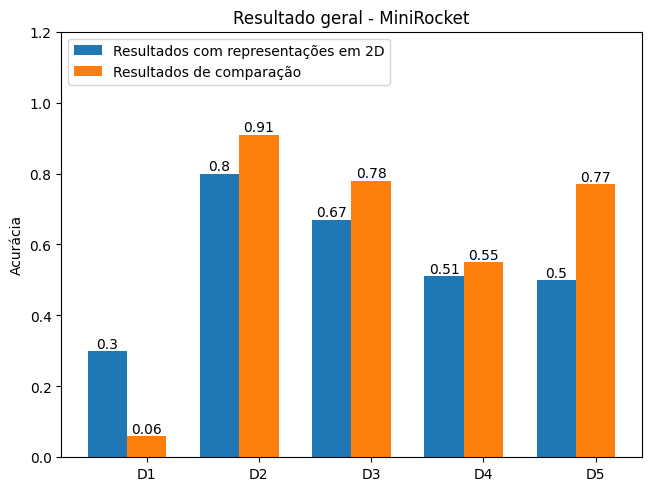

In [256]:
bar_data = df[
    df["convolution_algorithm"] == "MiniRocket"
    ].groupby("dataset").agg(
    {
        "accuracy": ["mean"],
        "base_minirocket_accuracy": ["mean"],
    }
)

x = np.arange(len(datasets))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

l1 = list(dict(bar_data)[("accuracy", "mean")])
l2 = list(dict(bar_data)[("base_minirocket_accuracy", "mean")])

factor = 10 ** 2
data = {
    "Resultados com representações em 2D": [math.trunc(i * factor) / factor for i in l1],
    "Resultados de comparação": [math.trunc(i * factor) / factor for i in l2],
}

for column, values in data.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset, 
        values,
        width, 
        label=column
    )
    ax.bar_label(rects, padding=0)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Resultado geral - MiniRocket')
ax.set_xticks(x + width, ["D1", "D2", "D3", "D4", "D5"])
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 1.2)

plt.show()


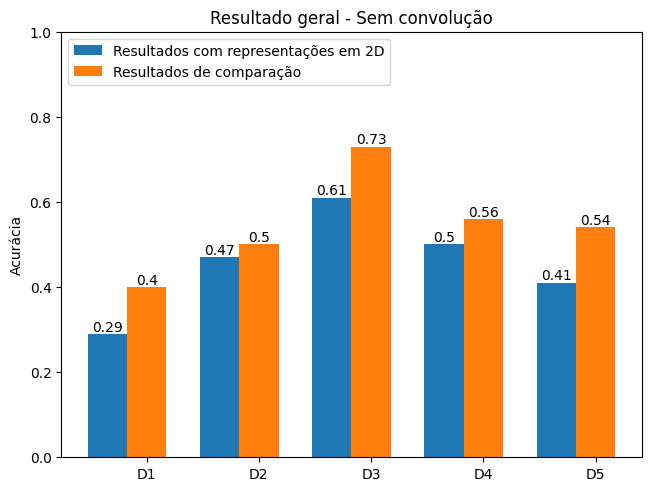

In [257]:
bar_data = df[
    df["convolution_algorithm"] == "No convolution"
].groupby("dataset").agg(
    {
        "accuracy": ["mean"],
        "base_no_convolution_accuracy": ["mean"],
    }
)

x = np.arange(len(datasets))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

l1 = list(dict(bar_data)[("accuracy", "mean")])
l2 = list(dict(bar_data)[("base_no_convolution_accuracy", "mean")])

factor = 10 ** 2
data = {
    "Resultados com representações em 2D": [math.trunc(i * factor) / factor for i in l1],
    "Resultados de comparação": [math.trunc(i * factor) / factor for i in l2],
}

for column, values in data.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        values,
        width,
        label=column
    )
    ax.bar_label(rects, padding=0)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Resultado geral - Sem convolução')
ax.set_xticks(x + width, ["D1", "D2", "D3", "D4", "D5"])
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 1)

plt.show()

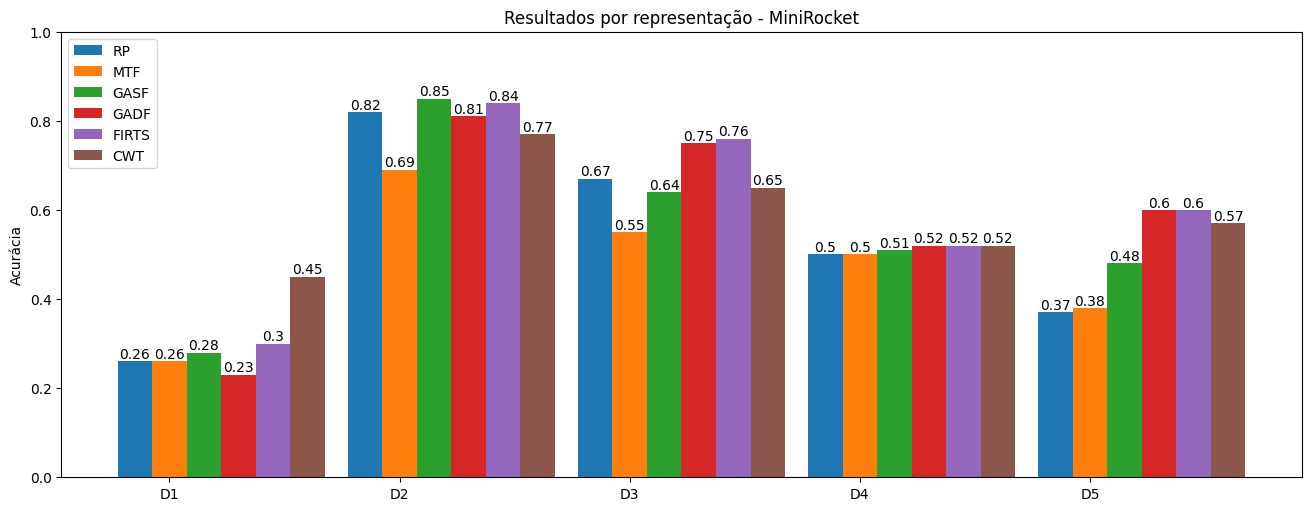

In [259]:
bar_data = df[
    df["convolution_algorithm"] == "MiniRocket"
].groupby(["dataset", "representation"]).agg(
    {
        "accuracy": ["mean"],
    }
)

bar_data = bar_data.reset_index()

x = np.arange(len(datasets))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(13, 5), layout='constrained')

factor = 10 ** 2
data = {}
for rep in representations:
    ls = list(bar_data[bar_data["representation"] == rep][("accuracy", "mean")]) 
    data[rep] = [math.trunc(i * factor) / factor for i in ls]
    
for column, values in data.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        values,
        width,
        label=column
    )
    ax.bar_label(rects, padding=0)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Resultados por representação - MiniRocket')
ax.set_xticks(x + width, ["D1", "D2", "D3", "D4", "D5"])
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 1)

plt.show()

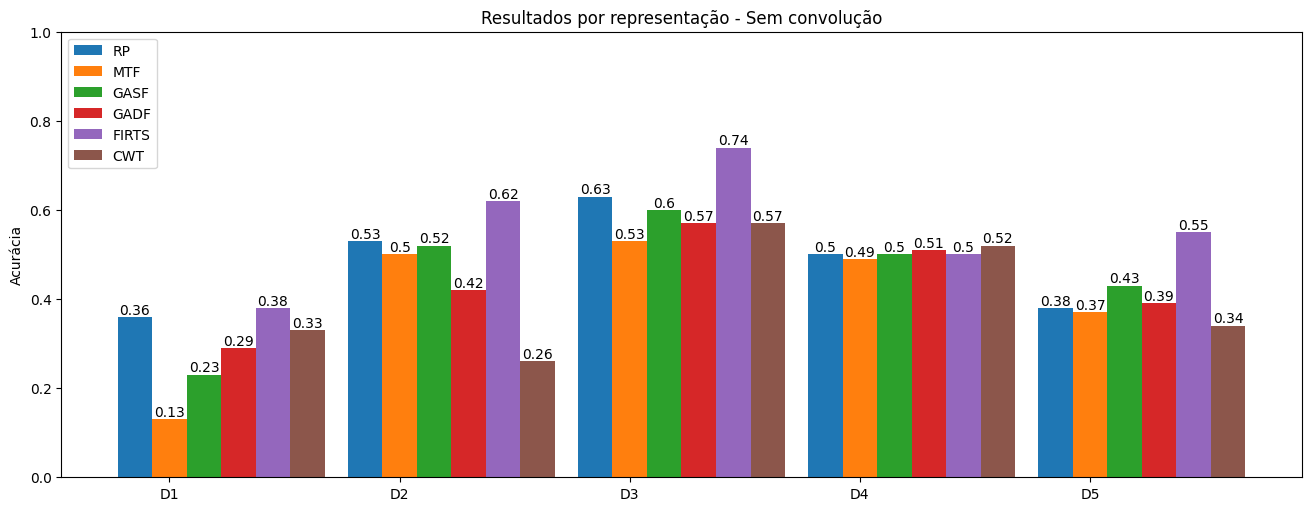

In [258]:
bar_data = df[
    df["convolution_algorithm"] == "No convolution"
    ].groupby(["dataset", "representation"]).agg(
    {
        "accuracy": ["mean"],
    }
)

bar_data = bar_data.reset_index()

x = np.arange(len(datasets))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(13, 5), layout='constrained')

factor = 10 ** 2
data = {}
for rep in representations:
    ls = list(bar_data[bar_data["representation"] == rep][("accuracy", "mean")])
    data[rep] = [math.trunc(i * factor) / factor for i in ls]

for column, values in data.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        values,
        width,
        label=column
    )
    ax.bar_label(rects, padding=0)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Resultados por representação - Sem convolução')
ax.set_xticks(x + width, ["D1", "D2", "D3", "D4", "D5"])
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 1)

plt.show()


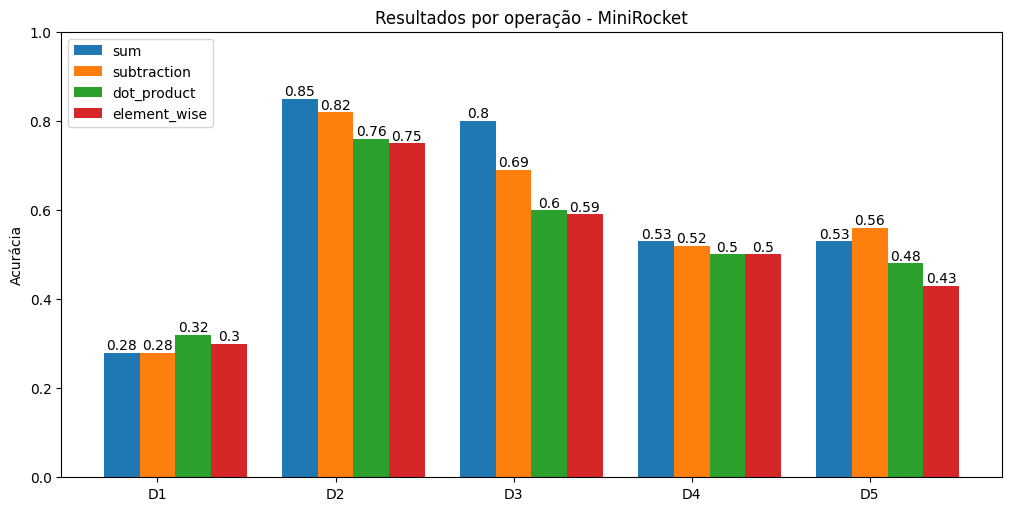

In [260]:
"""
Agora fazer por operação
"""

bar_data = df[
    df["convolution_algorithm"] == "MiniRocket"
].groupby(["dataset", "operation"]).agg(
    {
        "accuracy": ["mean"],
    }
)

bar_data = bar_data.reset_index()

x = np.arange(len(datasets))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

factor = 10 ** 2
data = {}
for op in operations:
    ls = list(bar_data[bar_data["operation"] == op][("accuracy", "mean")])
    data[op] = [math.trunc(i * factor) / factor for i in ls]

for column, values in data.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        values,
        width,
        label=column
    )
    ax.bar_label(rects, padding=0)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Resultados por operação - MiniRocket')
ax.set_xticks(x + width, ["D1", "D2", "D3", "D4", "D5"])
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 1)

plt.show()


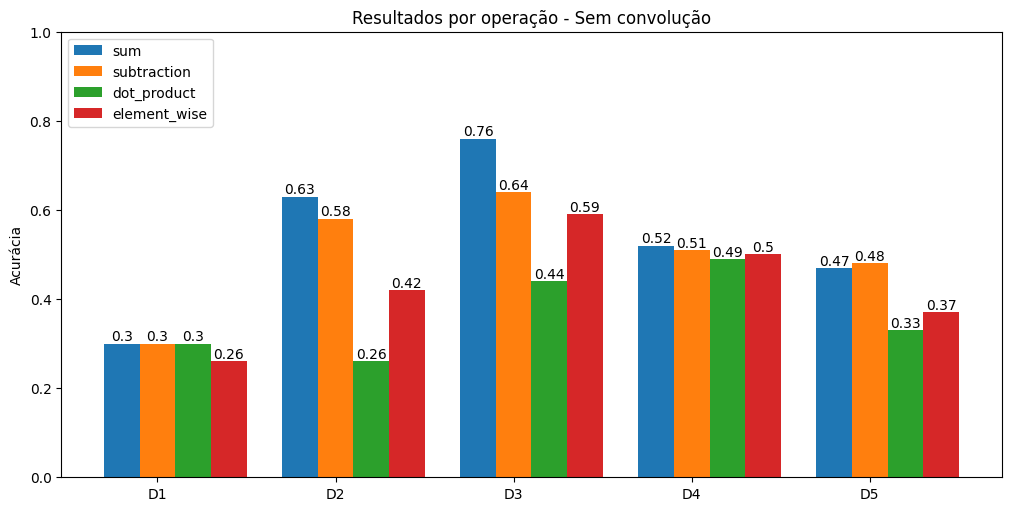

In [261]:
bar_data = df[
    df["convolution_algorithm"] == "No convolution"
    ].groupby(["dataset", "operation"]).agg(
    {
        "accuracy": ["mean"],
    }
)

bar_data = bar_data.reset_index()

x = np.arange(len(datasets))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

factor = 10 ** 2
data = {}
for op in operations:
    ls = list(bar_data[bar_data["operation"] == op][("accuracy", "mean")])
    data[op] = [math.trunc(i * factor) / factor for i in ls]

for column, values in data.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        values,
        width,
        label=column
    )
    ax.bar_label(rects, padding=0)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Resultados por operação - Sem convolução')
ax.set_xticks(x + width, ["D1", "D2", "D3", "D4", "D5"])
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 1)

plt.show()
